**ODD-ROLL: Write a python program to deal with EEG signal and finally apply some operations on it using the concept of Fourier Transformation.**


**The idea is to** generate eeg signal(combined) by using basic signals of different frequency like (delta,theta,omega,alpha,beta etc)

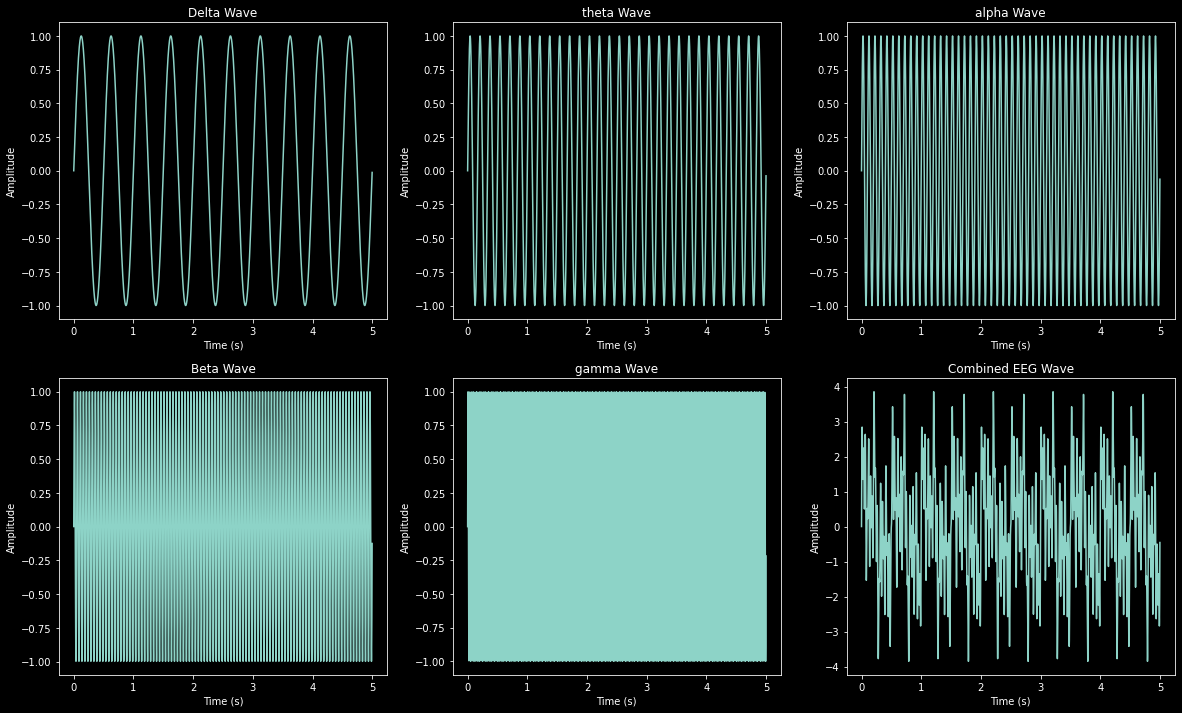

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style

# Generate delta wave signal
frequency_delta = 2  # Hz
sample_rate = 1000  # Hz
duration = 5  # second
time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
delta_wave = np.sin(2 * np.pi * frequency_delta * time)

#plot delta wave
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
plt.plot(time, delta_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Delta Wave')

# Generate  theta wave 
frequency_theta = 6  # Hz
theta_wave = np.sin(2 * np.pi * frequency_theta * time)

#plot theta wave
plt.subplot(2,3,2)
plt.plot(time, theta_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('theta Wave')


# Generate alpha wave
frequency_alpha = 10  # Hz
alpha_wave = np.sin(2 * np.pi * frequency_alpha * time)

#plot alpha_wave 
plt.subplot(2,3,3)
plt.plot(time, alpha_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('alpha Wave')


# Generate beta wave
frequency_beta = 20  # Hz
beta_wave = np.sin(2 * np.pi * frequency_beta * time)

#plot delta wave
plt.subplot(2,3,4)
plt.plot(time, beta_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Beta Wave')


# Generate gamma wave 
frequency_gamma = 35  # Hz
gamma_wave = np.sin(2 * np.pi * frequency_gamma * time)

#plot gamma wave
plt.subplot(2,3,5)
plt.plot(time, gamma_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('gamma Wave')


#Combine  wave
eeg_wave = delta_wave + theta_wave + alpha_wave + beta_wave + gamma_wave

#Plot combined EEG wave
plt.subplot(2,3,6)
plt.plot(time, eeg_wave)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Combined EEG Wave")
plt.show()

<ipython-input-20-cf68c37f6b49>:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline,stemlines,baseline=plt.stem(amps)
<ipython-input-20-cf68c37f6b49>:54: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline,stemlines,baseline=plt.stem(Hz,amps[range(0,len(Hz))])


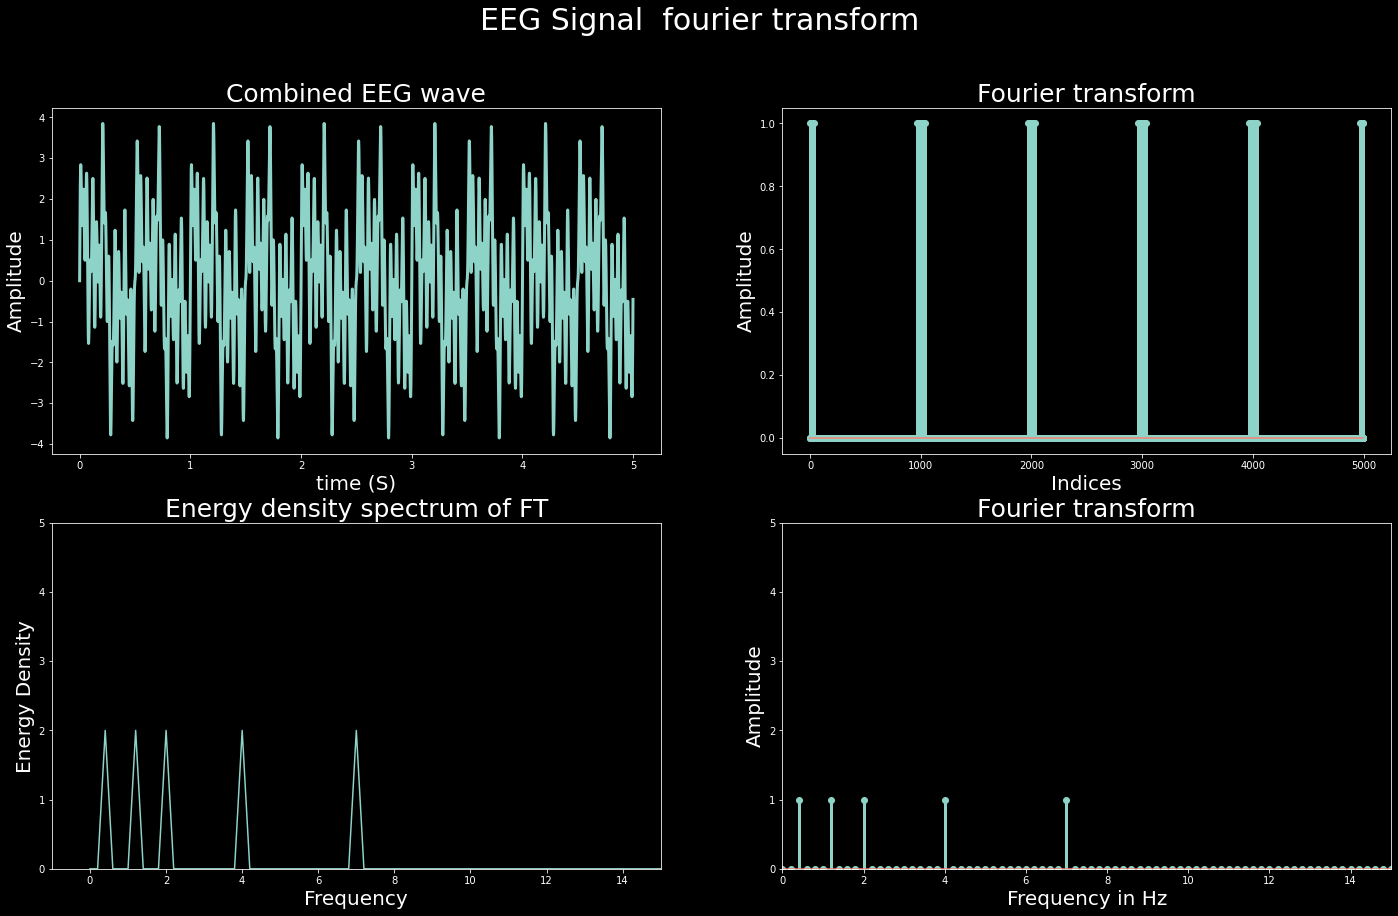

In [ ]:
#plot signal & fourier transform
plt.figure(figsize=(24,14))
plt.suptitle('EEG Signal  fourier transform',fontsize=30)
style.use('dark_background')

plt.subplot(2,2,1)
plt.plot(time,eeg_wave,linewidth=3)
plt.title("Combined EEG wave",fontsize=25)
plt.xlabel('time (S)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)


#initialize fourier coefficient
X=np.zeros(len(eeg_wave),dtype=complex)

for freq in range(0,len(time)):
  #create complex sin wave & compute dot product with signal
  csw=np.exp(-1j*2*np.pi*freq*time)
  X[freq]=np.sum(np.multiply(eeg_wave,csw))

#extract amplitude
#amps=np.abs(X)/len(time)
amps=2*np.abs(X)/len(time)

#in the above line of code we multiply by 2 to incorporate the negative frequencies
#of complex sinusoidal

Nyquist=sample_rate/2
Hz=np.linspace(0,Nyquist,math.floor(len(time)/2+1))

#Indices VS Amplitude plot of FT
plt.subplot(2,2,2)
markerline,stemlines,baseline=plt.stem(amps)
plt.setp(stemlines,'linewidth',3)
plt.title("Fourier transform",fontsize=25)
plt.xlabel('Indices',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)

#energy density calculation =amps**2
energy=2*np.abs(amps)**2


#Energy density spectrum plot of FT
plt.subplot(2,2,3)
plt.plot(Hz,energy[range(0,len(Hz))])
plt.xlim(-1,15)
plt.ylim(0,5)
plt.title("Energy density spectrum of FT",fontsize=25)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Energy Density',fontsize=20)

#Frequency VS Amplitude plot of FT
plt.subplot(2,2,4)
markerline,stemlines,baseline=plt.stem(Hz,amps[range(0,len(Hz))])
plt.setp(stemlines,'linewidth',3)
plt.xlim(0,15)
plt.ylim(0,5)
plt.title("Fourier transform",fontsize=25)
plt.xlabel('Frequency in Hz',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.show()